In [123]:
import pandas as pd
import pathpy as pp
import pathpy.algorithms.statistics as stat
import pathpy.algorithms.shortest_paths as shorty
import numpy as np
import math as m
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel (r'manufacturing_emails_temporal_network.xlsx')

In [16]:
nodes = pd.concat([df["node1"], df["node2"]]).unique()
N = len(nodes)
print (len(nodes))

167


In [6]:
temporal = pp.TemporalNetwork()
for ind in df.index:
    temporal.add_edge(df['node1'][ind], df['node2'][ind], int(df['timestamp'][ind]))
print(temporal)

Nodes:			167
Time-stamped links:	82876
Links/Nodes:		496.2634730538922
Observation period:	[1, 57791]
Observation length:	 57790 
Time stamps:		 57791 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


In [18]:
links = df[["node1","node2"]]
links = links.drop_duplicates()
L = links.shape[0]
aD = L*2/N
aD

38.92215568862275

In [31]:
net = pp.Network(directed=False)
np_links = links.to_numpy()
for l in np_links:
    net.add_edge(l[0], l[1])
print(net)



Undirected network
Nodes:				167
Links:				3250



In [42]:

print(f"Mean: {stat.mean_degree(net, degree='degree')} ")
print(f"Standard deviation: {stat.degree_moment(net, 2, degree='degree')**0.5} ")


Mean: 38.92215568862275 
Standard deviation: 50.08770750507327 


In [43]:
stat.avg_clustering_coefficient(net)

0.591863208548695

In [91]:
paths = shorty.shortest_paths(net)

In [108]:
p = list(paths.values())
total = [] 

# iterate over all the nodes
for i in range(N):
    # map dict to list
    p[i] = list(p[i].values())
    # get the length of each shortest path
    p[i] =  list(map(lambda x: len(list(x)[0]), p[i]))
    total = total + p[i]

print(len(paths))
print(len(total))
print(f"Average hop count: {np.average(total)}")
print(f"Max hop count: {np.max(total)}")





167
27889
Average hop count: 2.955609738606619
Max hop count: 6


In [105]:
print(m.log(N))

5.117993812416755


      node1  node2  timestamp
703      13     14       2908
203       3     13       1141
201       3      8        832
2406     50     75        775
2731     65     94        733
3250
[1.00000000e+00 1.97435049e+00 3.89805984e+00 7.69613634e+00
 1.51948705e+01 3.00000000e+01 5.92305146e+01 1.16941795e+02
 2.30884090e+02 4.55846116e+02 9.00000000e+02 1.77691544e+03
 3.50825386e+03 6.92652271e+03 1.36753835e+04]


Text(0, 0.5, 'fw(x)')

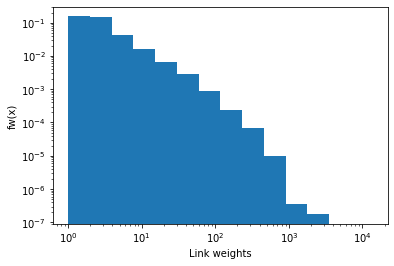

In [152]:
weighted_edges = df.groupby(['node1', 'node2'], as_index=False).agg({"timestamp": "count"}).sort_values(by="timestamp", ascending=False)
print(weighted_edges.head())

weights = weighted_edges["timestamp"].to_numpy()
print(len(weights))
df.sort_values(by="timestamp", ascending=False)


bins = 30**(np.arange(0,3, 0.2))
print( bins)
plt.xscale('log')
plt.hist(weights, bins = bins, density=True, log=True)
plt.xlabel("Link weights")
plt.ylabel("fw(x)")
